# MINI PROJECT

**Project Executors:**

</u></h>Uduma Uduma IDIKA & Muhammad HASSAN</u></h>

**Problem Statement:**

According to a report by Merchant Savvy on Global Payment Fraud Statistics, cumulative losses in online payments due to fraud are expected to amount to a whopping $343 billion for merchants between 2023 and 2027. The report also revealed that the top challenges facing businesses in managing fraud in 2023 were the ability to effectively use data to manage fraud and identifying/responding to emerging fraud attacks coming in first and second respectively.
Traditional fraud detection systems, primarily rule-based, are increasingly inadequate. These systems lack the adaptability to counter rapidly evolving fraud tactics, leading to high false-positive rates—sometimes as high as 90%, according to industry reports. This results in unnecessary transaction declines, dissatisfied customers, and inflated operational costs for fraud investigations.





**OBJECTIVES**
:To develop a scalable, AI-powered system that detects fraud in real-time financial transactions, enhancing security, reducing financial losses, and fostering customer trust. This was achieved through:-

***Efficient Financial Transactions Data Storage:***
by using MySQL to create a relational database for securely storing transaction data, ensuring data consistency and easy access.

***Data Processing with Big Data Tools***: through the utilization of Apache Spark framework to efficiently process large-scale transaction data, enabling faster analysis and model training.

***Machine Learning Model Development***: using Spark to classify transactions as legitimate or fraudulent and detect anomalies.

***Features Engineering and Analysis***: by identifying and engineering relevant features from financial transaction data to enhance model accuracy.

***Data Visualization and Reporting***: using Microsoft Power BI and Python libraries (Matplotlib, Seaborn, or Plotly) to visualize data trends, model performance, and detectfraud patterns for stakeholders.l.

# Step 1: Install Packages and Also Importing Libraries

**(1)- Install Packages**

**(2)- Importing the necessary libraries, classes, and methods**

In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# PySpark Libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col, when, count, sum as _sum, log
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Step 2: Initialize Spark session and add JDBC driver

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initialize Spark session and add JDBC driver
spark = SparkSession.builder \
    .appName("FraudDetectionDataProcessing") \
    .config("spark.jars", "/Users/TS_1/Downloads/mysql-connector-j-9.1.0/mysql-connector-j-9.1.0.jar") \
    .getOrCreate()


jdbc_url = "jdbc:mysql://localhost:3306/Financial"
properties = {
    "user": "root",
    "password": "Hassan@123",
    "driver": "com.mysql.cj.jdbc.Driver"
}



24/12/17 22:11:12 WARN Utils: Your hostname, TS-MacBookPro.local resolves to a loopback address: 127.0.0.1; using 172.20.10.3 instead (on interface en0)
24/12/17 22:11:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/12/17 22:11:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# Step 3: Load Dataset from mysql Database Using PYSPARK

In [83]:
account_activity_df = spark.read.jdbc(url=jdbc_url, table="Account_Activity", properties=properties)
customer_data_df = spark.read.jdbc(url=jdbc_url, table="Customer_Data", properties=properties)
fraud_indicators_df = spark.read.jdbc(url=jdbc_url, table="Fraud_Indicators", properties=properties)
suspicious_activity_df = spark.read.jdbc(url=jdbc_url, table="Suspicious_Activity", properties=properties)
merchant_data_df = spark.read.jdbc(url=jdbc_url, table="Merchant_Data", properties=properties)
transaction_category_df = spark.read.jdbc(url=jdbc_url, table="Transaction_Category", properties=properties)
amount_data_df = spark.read.jdbc(url=jdbc_url, table="Amount_Data", properties=properties)
anomaly_scores_df = spark.read.jdbc(url=jdbc_url, table="Anomaly_Scores", properties=properties)
transaction_metadata_df = spark.read.jdbc(url=jdbc_url, table="Transaction_Metadata", properties=properties)
transaction_records_df = spark.read.jdbc(url=jdbc_url, table="Transaction_Records", properties=properties)

In [84]:
# Exploratory Data Analysis
account_activity_df.show()


+-----------+-----------+-------------------+
|Customer_ID|Account_Bal|         Last_Login|
+-----------+-----------+-------------------+
|       1001|  9507.2721|2022-01-01 00:00:00|
|       1002|  7408.7045|2022-01-02 00:00:00|
|       1003|  1715.3220|2022-01-03 00:00:00|
|       1004|  3101.5091|2022-01-04 00:00:00|
|       1005|  5405.7669|2022-01-05 00:00:00|
|       1006|  9347.9672|2022-01-06 00:00:00|
|       1007|  2957.7601|2022-01-07 00:00:00|
|       1008|  8303.7736|2022-01-08 00:00:00|
|       1009|  5359.7478|2022-01-09 00:00:00|
|       1010|  9506.8827|2022-01-10 00:00:00|
|       1011|  1895.7059|2022-01-11 00:00:00|
|       1012|  2706.1489|2022-01-12 00:00:00|
|       1013|  8646.5072|2022-01-13 00:00:00|
|       1014|  9922.2920|2022-01-14 00:00:00|
|       1015|  3146.2482|2022-01-15 00:00:00|
|       1016|  8612.8573|2022-01-16 00:00:00|
|       1017|  5179.0010|2022-01-17 00:00:00|
|       1018|  2727.8305|2022-01-18 00:00:00|
|       1019|  3797.7345|2022-01-1

In [85]:
customer_data_df.show()


+-----------+-------------+---+------------+
|Customer_ID|         Name|Age|     Address|
+-----------+-------------+---+------------+
|       1001|Customer 1001| 54|Address 1001|
|       1002|Customer 1002| 35|Address 1002|
|       1003|Customer 1003| 40|Address 1003|
|       1004|Customer 1004| 30|Address 1004|
|       1005|Customer 1005| 46|Address 1005|
|       1006|Customer 1006| 59|Address 1006|
|       1007|Customer 1007| 33|Address 1007|
|       1008|Customer 1008| 21|Address 1008|
|       1009|Customer 1009| 32|Address 1009|
|       1010|Customer 1010| 26|Address 1010|
|       1011|Customer 1011| 57|Address 1011|
|       1012|Customer 1012| 45|Address 1012|
|       1013|Customer 1013| 21|Address 1013|
|       1014|Customer 1014| 27|Address 1014|
|       1015|Customer 1015| 59|Address 1015|
|       1016|Customer 1016| 22|Address 1016|
|       1017|Customer 1017| 21|Address 1017|
|       1018|Customer 1018| 28|Address 1018|
|       1019|Customer 1019| 37|Address 1019|
|       10

In [86]:
fraud_indicators_df.show()


+--------------+---------------+
|Transaction_ID|Fraud_Indicator|
+--------------+---------------+
|             1|              0|
|             2|              0|
|             3|              0|
|             4|              0|
|             5|              0|
|             6|              0|
|             7|              0|
|             8|              0|
|             9|              1|
|            10|              0|
|            11|              0|
|            12|              0|
|            13|              0|
|            14|              0|
|            15|              0|
|            16|              0|
|            17|              0|
|            18|              0|
|            19|              1|
|            20|              0|
+--------------+---------------+
only showing top 20 rows



In [87]:
suspicious_activity_df.show()


+-----------+---------------+
|Customer_ID|Suspicious_Flag|
+-----------+---------------+
|       1001|              0|
|       1002|              0|
|       1003|              0|
|       1004|              0|
|       1005|              0|
|       1006|              0|
|       1007|              0|
|       1008|              0|
|       1009|              0|
|       1010|              0|
|       1011|              0|
|       1012|              0|
|       1013|              0|
|       1014|              0|
|       1015|              0|
|       1016|              0|
|       1017|              0|
|       1018|              0|
|       1019|              0|
|       1020|              0|
+-----------+---------------+
only showing top 20 rows



In [88]:
merchant_data_df.show()


+-----------+-------------+-------------+
|Merchant_ID|Merchant_Name|     Location|
+-----------+-------------+-------------+
|       2001|Merchant 2001|Location 2001|
|       2002|Merchant 2002|Location 2002|
|       2003|Merchant 2003|Location 2003|
|       2004|Merchant 2004|Location 2004|
|       2005|Merchant 2005|Location 2005|
|       2006|Merchant 2006|Location 2006|
|       2007|Merchant 2007|Location 2007|
|       2008|Merchant 2008|Location 2008|
|       2009|Merchant 2009|Location 2009|
|       2010|Merchant 2010|Location 2010|
|       2011|Merchant 2011|Location 2011|
|       2012|Merchant 2012|Location 2012|
|       2013|Merchant 2013|Location 2013|
|       2014|Merchant 2014|Location 2014|
|       2015|Merchant 2015|Location 2015|
|       2016|Merchant 2016|Location 2016|
|       2017|Merchant 2017|Location 2017|
|       2018|Merchant 2018|Location 2018|
|       2019|Merchant 2019|Location 2019|
|       2020|Merchant 2020|Location 2020|
+-----------+-------------+-------

In [89]:
transaction_category_df.show()


+--------------+--------+
|Transaction_ID|Category|
+--------------+--------+
|             1|   Other|
|             2|  Online|
|             3|  Travel|
|             4|  Travel|
|             5|   Other|
|             6|    Food|
|             7|    Food|
|             8|  Travel|
|             9|  Retail|
|            10|   Other|
|            11|   Other|
|            12|    Food|
|            13|   Other|
|            14|  Travel|
|            15|   Other|
|            16|   Other|
|            17|   Other|
|            18|  Travel|
|            19|    Food|
|            20|  Travel|
+--------------+--------+
only showing top 20 rows



In [90]:
amount_data_df.show()


+--------------+------------------+
|Transaction_ID|Transaction_Amount|
+--------------+------------------+
|             1|           55.5303|
|             2|           12.8812|
|             3|           50.1763|
|             4|           41.6340|
|             5|           78.1229|
|             6|           86.9471|
|             7|           51.1471|
|             8|           56.1640|
|             9|           37.1824|
|            10|           17.2454|
|            11|           86.1809|
|            12|           95.5540|
|            13|           47.1385|
|            14|           98.8043|
|            15|           99.8326|
|            16|           20.7350|
|            17|           44.5451|
|            18|           27.0549|
|            19|           13.6155|
|            20|           20.8023|
+--------------+------------------+
only showing top 20 rows



In [91]:
anomaly_scores_df.show()


+--------------+--------------+
|Transaction_ID|Anomaly_Scores|
+--------------+--------------+
|             1|      0.686699|
|             2|      0.081749|
|             3|      0.023857|
|             4|      0.876994|
|             5|      0.034059|
|             6|      0.121173|
|             7|      0.109892|
|             8|      0.780534|
|             9|      0.010471|
|            10|      0.029376|
|            11|      0.083455|
|            12|      0.451735|
|            13|      0.444803|
|            14|      0.997340|
|            15|      0.827926|
|            16|      0.455947|
|            17|      0.078617|
|            18|      0.532820|
|            19|      0.252012|
|            20|      0.279159|
+--------------+--------------+
only showing top 20 rows



In [92]:
transaction_metadata_df.show()


+--------------+-----------+-------------------+
|Transaction_ID|Merchant_ID|         Time_stamp|
+--------------+-----------+-------------------+
|             1|       2701|2022-01-01 00:00:00|
|             2|       2070|2022-01-01 01:00:00|
|             3|       2238|2022-01-01 02:00:00|
|             4|       2879|2022-01-01 03:00:00|
|             5|       2966|2022-01-01 04:00:00|
|             6|       2757|2022-01-01 05:00:00|
|             7|       2096|2022-01-01 06:00:00|
|             8|       2493|2022-01-01 07:00:00|
|             9|       2612|2022-01-01 08:00:00|
|            10|       2638|2022-01-01 09:00:00|
|            11|       2007|2022-01-01 10:00:00|
|            12|       2746|2022-01-01 11:00:00|
|            13|       2092|2022-01-01 12:00:00|
|            14|       2892|2022-01-01 13:00:00|
|            15|       2849|2022-01-01 14:00:00|
|            16|       2640|2022-01-01 15:00:00|
|            17|       2858|2022-01-01 16:00:00|
|            18|    

In [93]:
transaction_records_df.show()

+--------------+-------+-----------+
|Transaction_ID| Amount|Customer_ID|
+--------------+-------+-----------+
|             1|55.5303|       1952|
|             2|12.8812|       1027|
|             3|50.1763|       1955|
|             4|41.6340|       1796|
|             5|78.1229|       1946|
|             6|86.9471|       1204|
|             7|51.1471|       1311|
|             8|56.1640|       1693|
|             9|37.1824|       1347|
|            10|17.2454|       1574|
|            11|86.1809|       1424|
|            12|95.5540|       1302|
|            13|47.1385|       1321|
|            14|98.8043|       1700|
|            15|99.8326|       1321|
|            16|20.7350|       1463|
|            17|44.5451|       1962|
|            18|27.0549|       1854|
|            19|13.6155|       1651|
|            20|20.8023|       1715|
+--------------+-------+-----------+
only showing top 20 rows



**Merging all in a single table**

In [95]:
# Standardize column names
transaction_records_df = transaction_records_df.withColumnRenamed("Transaction_ID", "TransactionID").withColumnRenamed("Customer_ID", "CustomerID")
transaction_category_df = transaction_category_df.withColumnRenamed("Transaction_ID", "TransactionID")
fraud_indicators_df = fraud_indicators_df.withColumnRenamed("Transaction_ID", "TransactionID")
amount_data_df = amount_data_df.withColumnRenamed("Transaction_ID", "TransactionID")
anomaly_scores_df = anomaly_scores_df.withColumnRenamed("Transaction_ID", "TransactionID")
transaction_metadata_df = transaction_metadata_df.withColumnRenamed("Transaction_ID", "TransactionID").withColumnRenamed("Merchant_ID", "MerchantID")
merchant_data_df = merchant_data_df.withColumnRenamed("Merchant_ID", "MerchantID")
customer_data_df = customer_data_df.withColumnRenamed("Customer_ID", "CustomerID")
account_activity_df = account_activity_df.withColumnRenamed("Customer_ID", "CustomerID")
suspicious_activity_df = suspicious_activity_df.withColumnRenamed("Customer_ID", "CustomerID")

# Perform joins to create a merged DataFrame
df_merged = transaction_records_df.join(
    transaction_category_df, on="TransactionID", how="inner"
).join(
    fraud_indicators_df, on="TransactionID", how="inner"
).join(
    amount_data_df, on="TransactionID", how="inner"
).join(
    anomaly_scores_df, on="TransactionID", how="inner"
).join(
    transaction_metadata_df, on="TransactionID", how="inner"
).join(
    merchant_data_df, on="MerchantID", how="inner"
).join(
    customer_data_df, on="CustomerID", how="inner"
).join(
    account_activity_df, on="CustomerID", how="inner"
).join(
    suspicious_activity_df, on="CustomerID", how="inner"
)

# Show the schema and first few rows of the merged DataFrame
df_merged.printSchema()
df_merged.show(5)


root
 |-- CustomerID: integer (nullable = true)
 |-- MerchantID: integer (nullable = true)
 |-- TransactionID: integer (nullable = true)
 |-- Amount: decimal(16,4) (nullable = true)
 |-- Category: string (nullable = true)
 |-- Fraud_Indicator: string (nullable = true)
 |-- Transaction_Amount: decimal(16,4) (nullable = true)
 |-- Anomaly_Scores: decimal(7,6) (nullable = true)
 |-- Time_stamp: timestamp (nullable = true)
 |-- Merchant_Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Account_Bal: decimal(16,4) (nullable = true)
 |-- Last_Login: timestamp (nullable = true)
 |-- Suspicious_Flag: string (nullable = true)

+----------+----------+-------------+-------+--------+---------------+------------------+--------------+-------------------+-------------+-------------+-------------+---+------------+-----------+-------------------+---------------+
|Custo

In [96]:
print(df_merged.columns)

['CustomerID', 'MerchantID', 'TransactionID', 'Amount', 'Category', 'Fraud_Indicator', 'Transaction_Amount', 'Anomaly_Scores', 'Time_stamp', 'Merchant_Name', 'Location', 'Name', 'Age', 'Address', 'Account_Bal', 'Last_Login', 'Suspicious_Flag']


**Handling Missing Values**

In [98]:
# Handle Missing Values
df_merged = df_merged.fillna({
    'Amount': 0,
    'Transaction_Amount': 0,
    'Anomaly_Scores': 0,
    'Age': 0,
    'Account_Bal': 0,
    'Category': 'unknown',
    'Merchant_Name': 'unknown',
    'Location': 'unknown',
    'Name': 'unknown',
    'Address': 'unknown',
    'Suspicious_Flag': 'unknown'
})


In [99]:
from pyspark.sql.functions import col, sum as _sum

# Count missing values per column
df_merged.select([(col(c).isNull().cast('int')).alias(c) for c in df_merged.columns]).show()


+----------+----------+-------------+------+--------+---------------+------------------+--------------+----------+-------------+--------+----+---+-------+-----------+----------+---------------+
|CustomerID|MerchantID|TransactionID|Amount|Category|Fraud_Indicator|Transaction_Amount|Anomaly_Scores|Time_stamp|Merchant_Name|Location|Name|Age|Address|Account_Bal|Last_Login|Suspicious_Flag|
+----------+----------+-------------+------+--------+---------------+------------------+--------------+----------+-------------+--------+----+---+-------+-----------+----------+---------------+
|         0|         0|            0|     0|       0|              0|                 0|             0|         0|            0|       0|   0|  0|      0|          0|         0|              0|
|         0|         0|            0|     0|       0|              0|                 0|             0|         0|            0|       0|   0|  0|      0|          0|         0|              0|
|         0|         0|       

In [100]:
# Log Transformation
df_merged = df_merged.withColumn('log_amount', log(col('amount') + 1))


In [101]:
df_merged.select('Amount', 'log_amount').show(5)

+-------+-----------------+
| Amount|       log_amount|
+-------+-----------------+
|71.6555|4.285729092587807|
|59.5870|4.104080348610106|
|90.0056|4.510921043084975|
|94.5228|4.559364962447498|
|53.2024|3.992725187908055|
+-------+-----------------+
only showing top 5 rows



**Drop Irrelevant Columns**

In [103]:
columns_to_drop = ['Time_stamp', 'Name', 'Address', 'Last_Login']
df_merged = df_merged.drop(*columns_to_drop)

**Encode Categorical Variables**

In [105]:
categorical_columns = ['Category', 'Merchant_Name', 'Location']
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]


**Normalize Numeric Features**

In [107]:
# Step 1: Determine the number of unique categories
num_unique_categories = df_merged.select("Category").distinct().count()
print(f"Number of unique categories: {num_unique_categories}")

# Count occurrences of each category
category_counts = df_merged.groupBy("Category").count().orderBy(F.col("count").asc())
category_counts.show()

# Check for null values in 'Category' and handle them
df_merged = df_merged.fillna({"Category": "Unknown"})  # Replace nulls with a placeholder value

# Step 2: Apply one-hot encoding
# First, use StringIndexer to convert the 'Category' column to a numeric index
indexer = StringIndexer(inputCol="Category", outputCol="CategoryIndex", handleInvalid="keep")
# `handleInvalid="keep"` ensures that invalid or unseen categories are handled gracefully.

# Then, use OneHotEncoder to one-hot encode the indexed column
encoder = OneHotEncoder(inputCol="CategoryIndex", outputCol="CategoryVec", handleInvalid="keep")

# Create and fit a pipeline for encoding
pipeline = Pipeline(stages=[indexer, encoder])
model = pipeline.fit(df_merged)

# Transform the DataFrame to include the one-hot encoded column
df_encoded = model.transform(df_merged)

# Optional: Drop intermediate columns (Category and CategoryIndex) if needed
df_encoded = df_encoded.drop("Category").drop("CategoryIndex")

# Verify that no null values exist in the one-hot encoded column
null_counts = df_encoded.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df_encoded.columns])
null_counts.show()

# Show the resulting DataFrame
df_encoded.show()

Number of unique categories: 5
+--------+-----+
|Category|count|
+--------+-----+
|  Retail|  192|
|  Online|  196|
|  Travel|  198|
|    Food|  204|
|   Other|  210|
+--------+-----+

+----------+----------+-------------+------+---------------+------------------+--------------+-------------+--------+---+-----------+---------------+----------+-----------+
|CustomerID|MerchantID|TransactionID|Amount|Fraud_Indicator|Transaction_Amount|Anomaly_Scores|Merchant_Name|Location|Age|Account_Bal|Suspicious_Flag|log_amount|CategoryVec|
+----------+----------+-------------+------+---------------+------------------+--------------+-------------+--------+---+-----------+---------------+----------+-----------+
|         0|         0|            0|     0|              0|                 0|             0|            0|       0|  0|          0|              0|         0|          0|
+----------+----------+-------------+------+---------------+------------------+--------------+-------------+--------+---+--

+----------+----------+-------------+-------+---------------+------------------+--------------+-------------+-------------+---+-----------+---------------+------------------+-------------+
|CustomerID|MerchantID|TransactionID| Amount|Fraud_Indicator|Transaction_Amount|Anomaly_Scores|Merchant_Name|     Location|Age|Account_Bal|Suspicious_Flag|        log_amount|  CategoryVec|
+----------+----------+-------------+-------+---------------+------------------+--------------+-------------+-------------+---+-----------+---------------+------------------+-------------+
|      1591|      2671|          183|71.6555|              0|           71.6555|      0.966645|Merchant 2671|Location 2671| 36|  7962.4103|              0| 4.285729092587807|(6,[3],[1.0])|
|      1591|      2830|          539|59.5870|              0|           59.5870|      0.182237|Merchant 2830|Location 2830| 36|  7962.4103|              0| 4.104080348610106|(6,[1],[1.0])|
|      1238|      2373|          987|90.0056|          

**Convert SparseVector to Array and perform One-Hot Encoding**

In [109]:
def sparse_to_array(sparse_vector):
    """Convert SparseVector or DenseVector to array."""
    if isinstance(sparse_vector, SparseVector) or isinstance(sparse_vector, DenseVector):
        return sparse_vector.toArray().tolist()
    return sparse_vector

sparse_to_array_udf = udf(sparse_to_array, ArrayType(DoubleType()))

df_encoded = df_encoded.withColumn("CategoryArray", sparse_to_array_udf(col("CategoryVec")))

# Step 2: Extract One-Hot Encoded Columns
category_cols = ["Category_Other", "Category_Food", "Category_Travel", "Category_Online", "Category_Retail"]

for i, category_name in enumerate(category_cols):
    df_encoded = df_encoded.withColumn(category_name, col("CategoryArray")[i])

# Step 3: Rename Columns for Consistency
df_encoded = df_encoded.withColumnRenamed("Transaction_Amount", "TransactionAmount")
df_encoded = df_encoded.withColumnRenamed("Anomaly_Scores", "AnomalyScore")
df_encoded = df_encoded.withColumnRenamed("Account_Bal", "AccountBalance")

# Step 4: Convert Binary Columns to Numerical
df_encoded = df_encoded.withColumn(
    "FraudIndicator", when(col("Fraud_Indicator") == "1", 1).otherwise(0)
).withColumn(
    "SuspiciousFlag", when(col("Suspicious_Flag") == "1", 1).otherwise(0)
)

# Corrected Selected Columns
selected_columns = [
    "CustomerID", "FraudIndicator", "TransactionAmount", "AnomalyScore",
    "MerchantID", "Age", "AccountBalance", "SuspiciousFlag",
    "Category_Food", "Category_Travel", "Category_Online", "Category_Retail", "Category_Other"
]

# Select Final DataFrame
final_df = df_encoded.select(*selected_columns)

# Verify the Final DataFrame
final_df.show(5)


+----------+--------------+-----------------+------------+----------+---+--------------+--------------+-------------+---------------+---------------+---------------+--------------+
|CustomerID|FraudIndicator|TransactionAmount|AnomalyScore|MerchantID|Age|AccountBalance|SuspiciousFlag|Category_Food|Category_Travel|Category_Online|Category_Retail|Category_Other|
+----------+--------------+-----------------+------------+----------+---+--------------+--------------+-------------+---------------+---------------+---------------+--------------+
|      1591|             0|          71.6555|    0.966645|      2671| 36|     7962.4103|             0|          0.0|            0.0|            1.0|            0.0|           0.0|
|      1591|             0|          59.5870|    0.182237|      2830| 36|     7962.4103|             0|          1.0|            0.0|            0.0|            0.0|           0.0|
|      1238|             0|          90.0056|    0.281085|      2373| 38|     8228.8979|       

**Heatmap**

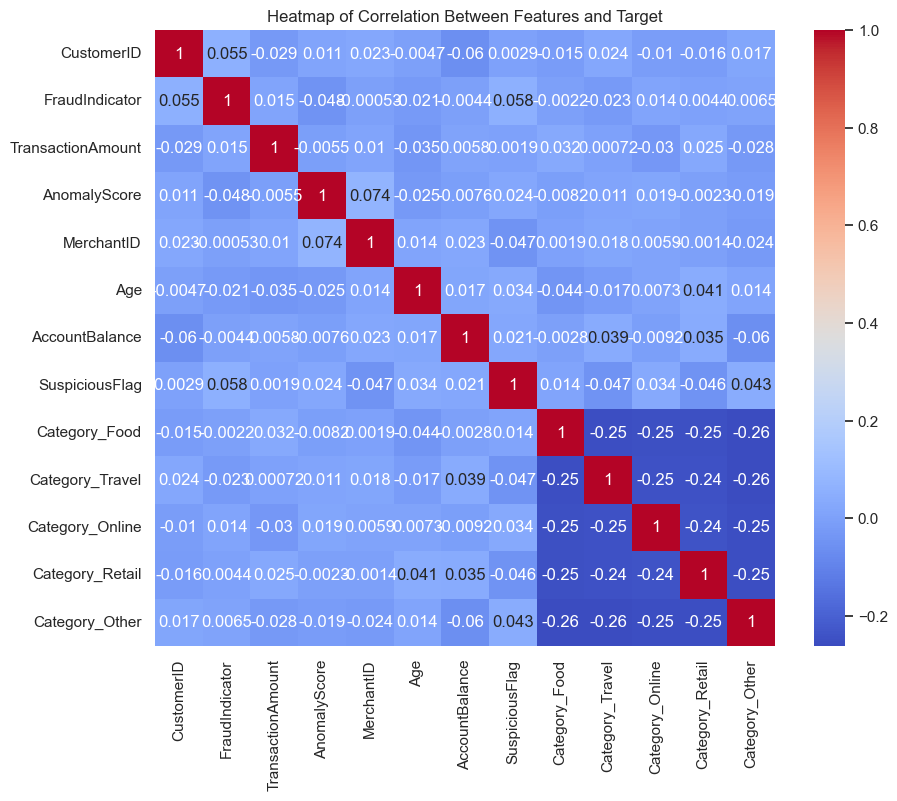

In [111]:
# Convert Spark DataFrame to Pandas for Visualization
pandas_df = final_df.toPandas()

# Compute Correlation Matrix
corr_matrix = pandas_df.corr()

# Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Between Features and Target")
plt.show()


**Target Column**

In [113]:
# Label Column (Target)
df_merged = df_merged.withColumn('label', when(col('Fraud_Indicator') == 'Yes', 1).otherwise(0))


In [114]:
# Step 1: Create log_amount Column (if not created already)
df_merged = df_merged.withColumn("log_amount", log(col("Amount") + 1))

# Step 2: String Indexer for Categorical Columns
categorical_columns = ["Category", "Merchant_Name", "Location"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]

# Step 3: Assemble Features
numeric_columns = ["log_amount", "Anomaly_Scores", "Age", "Account_Bal"]  # Numeric Features
feature_columns = [f"{col}_index" for col in categorical_columns] + numeric_columns  # Combine Features
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Step 4: Pipeline for Transformation
pipeline = Pipeline(stages=indexers + [assembler])

# Step 5: Transform DataFrame
df_transformed = pipeline.fit(df_merged).transform(df_merged)

# Step 6: Check the Transformed Data
df_transformed.select("features", "label").show(5)


+--------------------+-----+
|            features|label|
+--------------------+-----+
|[3.0,514.0,514.0,...|    0|
|[1.0,582.0,582.0,...|    0|
|[1.0,37.0,37.0,4....|    0|
|[2.0,409.0,409.0,...|    0|
|[4.0,12.0,12.0,3....|    0|
+--------------------+-----+
only showing top 5 rows



In [115]:
# Convert PySpark DataFrame to Pandas DataFrame with "features" and "label"
pandas_df = df_transformed.select("features", "label").toPandas()

# Ensure "label" column is available and check the value counts
print("Label Value Counts:")
print(pandas_df['label'].value_counts())


Label Value Counts:
label
0    1000
Name: count, dtype: int64


In [116]:
df_merged.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    0| 1000|
+-----+-----+



In [117]:
df_merged.groupBy("Fraud_Indicator").count().show()

+---------------+-----+
|Fraud_Indicator|count|
+---------------+-----+
|              0|  955|
|              1|   45|
+---------------+-----+



In [118]:
df_merged = df_merged.withColumn('label', when(col('Fraud_Indicator') == 'Yes', 1).otherwise(0))
df_merged.groupBy("label").count().show()


+-----+-----+
|label|count|
+-----+-----+
|    0| 1000|
+-----+-----+



In [119]:
df_merged = df_merged.withColumn("label", when(col("Fraud_Indicator") == 1, 1).otherwise(0))
df_merged.groupBy("label").count().show()


+-----+-----+
|label|count|
+-----+-----+
|    1|   45|
|    0|  955|
+-----+-----+



In [120]:
# Assemble features into a single vector
feature_columns = ['log_amount', 'Anomaly_Scores', 'Account_Bal', 'Age']  
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_transformed = assembler.transform(df_merged)

# Convert PySpark DataFrame to Pandas DataFrame for SMOTE
pandas_df = df_transformed.select("features", "label").toPandas()
feature_df = pd.DataFrame(
    pandas_df["features"].tolist(),
    columns=[f"feature_{i}" for i in range(len(pandas_df["features"][0]))]
)
feature_df["label"] = pandas_df["label"]

print(feature_df["label"].value_counts())  # Verify class distribution


label
0    955
1     45
Name: count, dtype: int64


In [121]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(
    feature_df.drop("label", axis=1), feature_df["label"]
)

# Check class distribution after resampling
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())


Class distribution after SMOTE: label
0    955
1    955
Name: count, dtype: int64


In [122]:
resampled_df = spark.createDataFrame(
    pd.DataFrame(X_resampled, columns=[f"feature_{i}" for i in range(X_resampled.shape[1])])
    .assign(label=y_resampled)
)


In [123]:
# Define the feature columns (all columns starting with "feature_")
feature_cols = [f"feature_{i}" for i in range(X_resampled.shape[1])]

# Assemble feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
resampled_df = assembler.transform(resampled_df)


In [124]:
resampled_df.select("features", "label").show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[4.28572909258780...|    0|
|[4.10408034861010...|    0|
|[4.51092104308497...|    0|
|[4.55936496244749...|    0|
|[3.99272518790805...|    0|
+--------------------+-----+
only showing top 5 rows



**Train-Test Split -
 Train Random Forest**


In [126]:
train, test = resampled_df.randomSplit([0.8, 0.2], seed=42)

# Train Random Forest
rf = RandomForestClassifier(featuresCol="features", labelCol="label")
model = rf.fit(train)


In [127]:
# Evaluate Model
predictions = model.transform(test)
evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)

print(f"Random Forest ROC AUC: {roc_auc:.4f}")

Random Forest ROC AUC: 0.7752


In [128]:
# Define a window specification
window_spec = Window.partitionBy("CustomerID")

# Add derived features
df_merged = df_merged.withColumn("transaction_amount_log", log(col("Amount") + 1)) \
                     .withColumn("customer_transaction_count", count("TransactionID").over(window_spec))

# Verify the new columns
df_merged.select("CustomerID", "transaction_amount_log", "customer_transaction_count").show(10)


+----------+----------------------+--------------------------+
|CustomerID|transaction_amount_log|customer_transaction_count|
+----------+----------------------+--------------------------+
|      1001|     3.545892065575451|                         1|
|      1003|    3.4651169612949455|                         1|
|      1004|     2.498735587724442|                         2|
|      1004|     3.846946739731883|                         2|
|      1005|     4.416533128335257|                         1|
|      1007|    3.7426950647855515|                         1|
|      1008|     4.523631443145117|                         1|
|      1009|     4.580089273018885|                         2|
|      1009|    3.5877184415198644|                         2|
|      1012|     4.137707326252107|                         2|
+----------+----------------------+--------------------------+
only showing top 10 rows



In [129]:
# Step 2: Scaling Numerical Features
numeric_columns = ["transaction_amount_log", "Anomaly_Scores", "Account_Bal", "Age", "customer_transaction_count"]
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="numeric_features")
df_transformed = assembler.transform(df_merged)

scaler = MinMaxScaler(inputCol="numeric_features", outputCol="scaled_features")
df_transformed = scaler.fit(df_transformed).transform(df_transformed)


In [130]:
# Step 3: Encode Categorical Features
categorical_columns = ["Category", "Merchant_Name", "Location"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]

for indexer in indexers:
    df_transformed = indexer.fit(df_transformed).transform(df_transformed)


In [131]:
# Step 4: Assemble Final Features
feature_cols = ["scaled_features"] + [f"{col}_index" for col in categorical_columns]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_transformed = assembler.transform(df_transformed)

# Verify the final features column
df_transformed.select("features").show(5)


+--------------------+
|            features|
+--------------------+
|[0.51788701374777...|
|[0.48142764330073...|
|[0.04523313998232...|
|[0.65377373265272...|
|[0.91086731772030...|
+--------------------+
only showing top 5 rows



In [132]:
# Step 1: Calculate class weights
class_counts = df_transformed.groupBy("label").count().collect()
total_count = sum(row["count"] for row in class_counts)
class_weights = {row["label"]: total_count / row["count"] for row in class_counts}


In [133]:
# Step 2: Add classWeightCol
df_transformed = df_transformed.withColumn(
    "classWeightCol", 
    when(col("label") == 1, class_weights[1]).otherwise(class_weights[0])
)


In [134]:
# Verify class weights
df_transformed.select("label", "classWeightCol").show(10)



+-----+------------------+
|label|    classWeightCol|
+-----+------------------+
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
|    0|1.0471204188481675|
+-----+------------------+
only showing top 10 rows



**Model Training and Performance**

In [136]:
# Train-Test Split
train, test = resampled_df.randomSplit([0.8, 0.2], seed=42)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(featuresCol="features", labelCol="label", maxIter=10, regParam=0.01),
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=10),
    "Gradient-Boosted Trees": GBTClassifier(featuresCol="features", labelCol="label", maxIter=50, maxDepth=5),
    "Decision Tree": DecisionTreeClassifier(featuresCol="features", labelCol="label", maxDepth=10)
}

# Evaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Results Storage
results = []

# Train and Evaluate Each Model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the Model
    trained_model = model.fit(train)
    
    # Make Predictions
    predictions = trained_model.transform(test)
    
    # Evaluate Metrics
    roc_auc = binary_evaluator.evaluate(predictions)
    accuracy = multi_evaluator.evaluate(predictions)

    # Compute Precision, Recall, and F1-Score
    metrics = predictions.withColumn("tp", when((col("label") == 1) & (col("prediction") == 1), 1).otherwise(0)) \
                         .withColumn("fp", when((col("label") == 0) & (col("prediction") == 1), 1).otherwise(0)) \
                         .withColumn("tn", when((col("label") == 0) & (col("prediction") == 0), 1).otherwise(0)) \
                         .withColumn("fn", when((col("label") == 1) & (col("prediction") == 0), 1).otherwise(0))
    
    # Aggregate metrics
    metrics_agg = metrics.selectExpr(
        "sum(tp) as tp", 
        "sum(fp) as fp", 
        "sum(tn) as tn", 
        "sum(fn) as fn"
    ).collect()[0]
    tp, fp, tn, fn = metrics_agg["tp"], metrics_agg["fp"], metrics_agg["tn"], metrics_agg["fn"]

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store Results
    results.append((model_name, roc_auc, accuracy, precision, recall, f1_score))
    print(f"{model_name} - ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")

# Display All Results
print("\nModel Performance Summary:")
for result in results:
    print(f"{result[0]} - ROC AUC: {result[1]:.4f}, Accuracy: {result[2]:.4f}, Precision: {result[3]:.4f}, Recall: {result[4]:.4f}, F1-Score: {result[5]:.4f}")


Training Logistic Regression...
Logistic Regression - ROC AUC: 0.5890, Accuracy: 0.5580, Precision: 0.5965, Recall: 0.5178, F1-Score: 0.5543
Training Random Forest...


24/12/17 22:00:28 WARN DAGScheduler: Broadcasting large task binary with size 1273.1 KiB
24/12/17 22:00:28 WARN DAGScheduler: Broadcasting large task binary with size 1644.7 KiB
24/12/17 22:00:28 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
24/12/17 22:00:29 WARN DAGScheduler: Broadcasting large task binary with size 1576.2 KiB
24/12/17 22:00:29 WARN DAGScheduler: Broadcasting large task binary with size 1588.5 KiB
24/12/17 22:00:30 WARN DAGScheduler: Broadcasting large task binary with size 1588.2 KiB


Random Forest - ROC AUC: 0.9457, Accuracy: 0.8518, Precision: 0.8142, Recall: 0.9340, F1-Score: 0.8700
Training Gradient-Boosted Trees...
Gradient-Boosted Trees - ROC AUC: 0.9214, Accuracy: 0.8410, Precision: 0.8194, Recall: 0.8985, F1-Score: 0.8571
Training Decision Tree...
Decision Tree - ROC AUC: 0.8087, Accuracy: 0.8329, Precision: 0.8027, Recall: 0.9086, F1-Score: 0.8524

Model Performance Summary:
Logistic Regression - ROC AUC: 0.5890, Accuracy: 0.5580, Precision: 0.5965, Recall: 0.5178, F1-Score: 0.5543
Random Forest - ROC AUC: 0.9457, Accuracy: 0.8518, Precision: 0.8142, Recall: 0.9340, F1-Score: 0.8700
Gradient-Boosted Trees - ROC AUC: 0.9214, Accuracy: 0.8410, Precision: 0.8194, Recall: 0.8985, F1-Score: 0.8571
Decision Tree - ROC AUC: 0.8087, Accuracy: 0.8329, Precision: 0.8027, Recall: 0.9086, F1-Score: 0.8524


**Comparison of Performance Metrics Across Multiple Models**

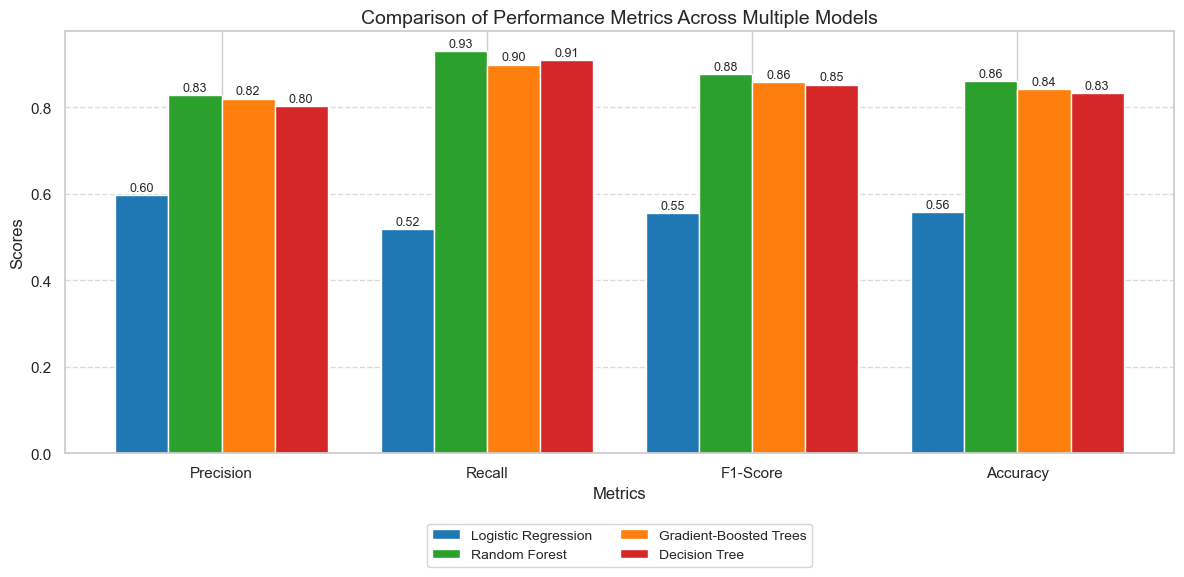

In [138]:

# Model Results
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
logistic_regression = [0.5965, 0.5178, 0.5543, 0.5580]
random_forest = [0.8281, 0.9289, 0.8756, 0.8598]
gradient_boosted = [0.8194, 0.8985, 0.8571, 0.8410]
decision_tree = [0.8027, 0.9086, 0.8524, 0.8329]

# Combine the data for all models
data = np.array([
    logistic_regression,
    random_forest,
    gradient_boosted,
    decision_tree
])

# Model names
model_names = ["Logistic Regression", "Random Forest", "Gradient-Boosted Trees", "Decision Tree"]

# X positions
x = np.arange(len(metrics))
width = 0.2  # Width of each bar

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))

# Add bars for each model
plt.bar(x - 1.5 * width, logistic_regression, width, label="Logistic Regression", color="#1f77b4")
plt.bar(x - 0.5 * width, random_forest, width, label="Random Forest", color="#2ca02c")
plt.bar(x + 0.5 * width, gradient_boosted, width, label="Gradient-Boosted Trees", color="#ff7f0e")
plt.bar(x + 1.5 * width, decision_tree, width, label="Decision Tree", color="#d62728")

# Add text above the bars
for i in range(len(metrics)):
    plt.text(x[i] - 1.5 * width, logistic_regression[i] + 0.01, f"{logistic_regression[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] - 0.5 * width, random_forest[i] + 0.01, f"{random_forest[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + 0.5 * width, gradient_boosted[i] + 0.01, f"{gradient_boosted[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + 1.5 * width, decision_tree[i] + 0.01, f"{decision_tree[i]:.2f}", ha='center', fontsize=9)

# Labels and Title
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Comparison of Performance Metrics Across Multiple Models", fontsize=14)
plt.xticks(x, metrics, fontsize=11)

# Move the legend to the bottom
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

# Grid and layout
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


**ROC Curve for Multiple Models**

Training Logistic Regression...


Training Random Forest...


24/12/17 22:00:54 WARN DAGScheduler: Broadcasting large task binary with size 1273.1 KiB
24/12/17 22:00:54 WARN DAGScheduler: Broadcasting large task binary with size 1644.7 KiB
24/12/17 22:00:54 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
24/12/17 22:00:55 WARN DAGScheduler: Broadcasting large task binary with size 1571.2 KiB


Training Gradient-Boosted Trees...


Training Decision Tree...


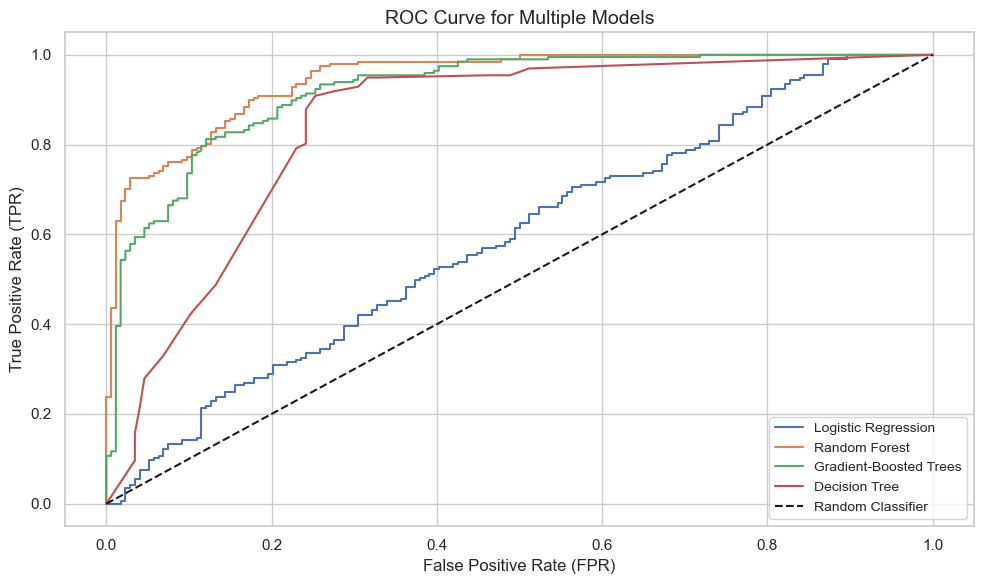

In [140]:
# Train-Test Split
train, test = resampled_df.randomSplit([0.8, 0.2], seed=42)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(featuresCol="features", labelCol="label", probabilityCol="probability"),
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="label", probabilityCol="probability", numTrees=100, maxDepth=10),
    "Gradient-Boosted Trees": GBTClassifier(featuresCol="features", labelCol="label", maxIter=50, maxDepth=5),
    "Decision Tree": DecisionTreeClassifier(featuresCol="features", labelCol="label", probabilityCol="probability", maxDepth=10)
}

# UDF to extract probability of positive class (label=1)
extract_prob = udf(lambda prob: float(prob[1]), FloatType())

# Function to Compute ROC Curve Points
def get_roc_points(predictions):
    # Add a new column with positive class probability
    predictions = predictions.withColumn("positive_prob", extract_prob(col("probability")))
    
    # Extract probabilities and labels
    probability_df = predictions.select("positive_prob", "label").toPandas()
    y_true = probability_df["label"].values
    y_prob = probability_df["positive_prob"].values
    
    # Compute ROC curve using sklearn
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return fpr, tpr

# Plot ROC Curves
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    print(f"Training {model_name}...")
    trained_model = model.fit(train)
    predictions = trained_model.transform(test)
    
    # Compute ROC curve points
    fpr, tpr = get_roc_points(predictions)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{model_name}")

# Add Random Classifier (Baseline)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Add Titles, Labels, and Legend
plt.title("ROC Curve for Multiple Models", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

# Show the ROC Curve
plt.tight_layout()
plt.show()


In [141]:

# Train-Test Split
train, test = resampled_df.randomSplit([0.8, 0.2], seed=42)

# Define Models
models = {
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=10),
    "Gradient-Boosted Trees": GBTClassifier(featuresCol="features", labelCol="label", maxIter=50, maxDepth=5),
}

# Evaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Extract Feature Importance Function
def get_feature_importance(model, feature_cols):
    importances = model.featureImportances
    return [(feature_cols[i], importance) for i, importance in enumerate(importances) if importance > 0]

# Store Results
results = []

# Train, Extract Feature Importance, and Retrain
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the Model
    trained_model = model.fit(train)

    # Feature Importance Extraction
    feature_cols = [f"feature_{i}" for i in range(train.select("features").first()["features"].size)]
    feature_importances = get_feature_importance(trained_model, feature_cols)

    # Sort and Display Top Features
    feature_importances = sorted(feature_importances, key=lambda x: -x[1])
    print(f"Top Features for {model_name}:")
    for feature, importance in feature_importances:
        print(f"{feature}: {importance:.4f}")
    
    # Select Important Features
    top_features = [feature for feature, importance in feature_importances[:5]]  # Top 5 features
    print(f"Retraining {model_name} with top features: {top_features}")

    # Re-assemble Features
    assembler = VectorAssembler(inputCols=top_features, outputCol="new_features")
    train_new = assembler.transform(train).select(col("new_features").alias("features"), "label")
    test_new = assembler.transform(test).select(col("new_features").alias("features"), "label")

    # Retrain the Model
    retrained_model = model.setFeaturesCol("features").fit(train_new)
    predictions = retrained_model.transform(test_new)

    # Evaluate Metrics
    roc_auc = binary_evaluator.evaluate(predictions)
    accuracy = multi_evaluator.evaluate(predictions)

    # Compute Precision, Recall, and F1-Score
    metrics = predictions.withColumn("tp", when((col("label") == 1) & (col("prediction") == 1), 1).otherwise(0)) \
                         .withColumn("fp", when((col("label") == 0) & (col("prediction") == 1), 1).otherwise(0)) \
                         .withColumn("tn", when((col("label") == 0) & (col("prediction") == 0), 1).otherwise(0)) \
                         .withColumn("fn", when((col("label") == 1) & (col("prediction") == 0), 1).otherwise(0))
    
    metrics_agg = metrics.selectExpr("sum(tp) as tp", "sum(fp) as fp", "sum(tn) as tn", "sum(fn) as fn").collect()[0]
    tp, fp, tn, fn = metrics_agg["tp"], metrics_agg["fp"], metrics_agg["tn"], metrics_agg["fn"]

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store Results
    results.append((model_name, roc_auc, accuracy, precision, recall, f1_score))
    print(f"{model_name} - Retrained ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")

# Display Summary of Results
print("\nRetrained Model Performance Summary:")
for result in results:
    print(f"{result[0]} - ROC AUC: {result[1]:.4f}, Accuracy: {result[2]:.4f}, Precision: {result[3]:.4f}, Recall: {result[4]:.4f}, F1-Score: {result[5]:.4f}")


Training Random Forest...


24/12/17 22:01:15 WARN DAGScheduler: Broadcasting large task binary with size 1273.1 KiB
24/12/17 22:01:15 WARN DAGScheduler: Broadcasting large task binary with size 1644.7 KiB
24/12/17 22:01:16 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


Top Features for Random Forest:
feature_2: 0.3456
feature_3: 0.2408
feature_1: 0.2069
feature_0: 0.2066
Retraining Random Forest with top features: ['feature_2', 'feature_3', 'feature_1', 'feature_0']


24/12/17 22:01:18 WARN DAGScheduler: Broadcasting large task binary with size 1294.3 KiB
24/12/17 22:01:18 WARN DAGScheduler: Broadcasting large task binary with size 1665.2 KiB
24/12/17 22:01:19 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
24/12/17 22:01:19 WARN DAGScheduler: Broadcasting large task binary with size 1578.0 KiB
24/12/17 22:01:20 WARN DAGScheduler: Broadcasting large task binary with size 1590.3 KiB
24/12/17 22:01:20 WARN DAGScheduler: Broadcasting large task binary with size 1590.1 KiB


Random Forest - Retrained ROC AUC: 0.9442, Accuracy: 0.8625, Precision: 0.8259, Recall: 0.9391, F1-Score: 0.8789
Training Gradient-Boosted Trees...
Top Features for Gradient-Boosted Trees:
feature_2: 0.3683
feature_3: 0.2485
feature_1: 0.1955
feature_0: 0.1877
Retraining Gradient-Boosted Trees with top features: ['feature_2', 'feature_3', 'feature_1', 'feature_0']
Gradient-Boosted Trees - Retrained ROC AUC: 0.9218, Accuracy: 0.8410, Precision: 0.8194, Recall: 0.8985, F1-Score: 0.8571

Retrained Model Performance Summary:
Random Forest - ROC AUC: 0.9442, Accuracy: 0.8625, Precision: 0.8259, Recall: 0.9391, F1-Score: 0.8789
Gradient-Boosted Trees - ROC AUC: 0.9218, Accuracy: 0.8410, Precision: 0.8194, Recall: 0.8985, F1-Score: 0.8571


**ROC Curve Comparison**

Training Random Forest...


24/12/17 22:01:52 WARN DAGScheduler: Broadcasting large task binary with size 1273.1 KiB
24/12/17 22:01:52 WARN DAGScheduler: Broadcasting large task binary with size 1644.7 KiB
24/12/17 22:01:53 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
24/12/17 22:01:53 WARN DAGScheduler: Broadcasting large task binary with size 1576.2 KiB
24/12/17 22:01:54 WARN DAGScheduler: Broadcasting large task binary with size 1579.7 KiB
24/12/17 22:01:55 WARN DAGScheduler: Broadcasting large task binary with size 1578.9 KiB
24/12/17 22:01:55 WARN DAGScheduler: Broadcasting large task binary with size 1578.9 KiB
24/12/17 22:01:56 WARN DAGScheduler: Broadcasting large task binary with size 1578.9 KiB


Random Forest - ROC AUC: 0.9457, Accuracy: 0.8518, Precision: 0.8142, Recall: 0.9340, F1-Score: 0.8700


24/12/17 22:01:56 WARN DAGScheduler: Broadcasting large task binary with size 1572.2 KiB


Training Gradient-Boosted Trees...
Gradient-Boosted Trees - ROC AUC: 0.9214, Accuracy: 0.8410, Precision: 0.8194, Recall: 0.8985, F1-Score: 0.8571


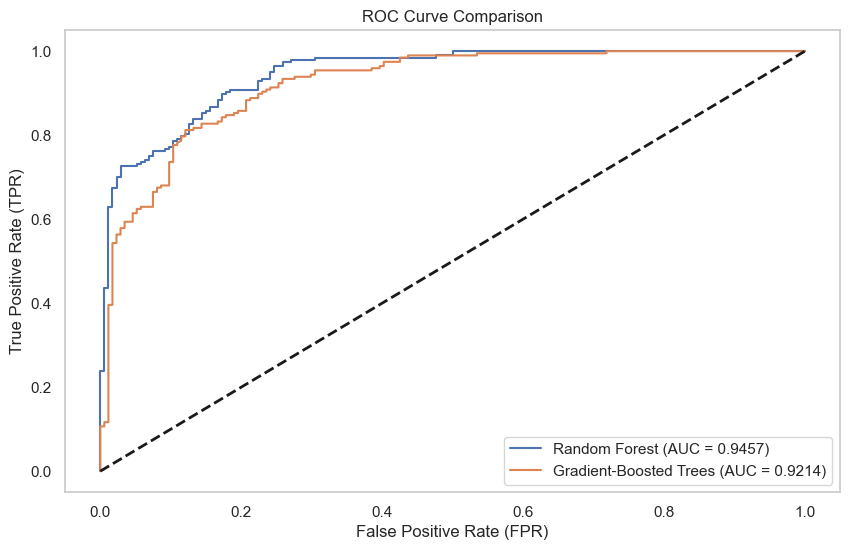

In [143]:

# Train-Test Split
train, test = resampled_df.randomSplit([0.8, 0.2], seed=42)

# Define Models
models = {
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, maxDepth=10),
    "Gradient-Boosted Trees": GBTClassifier(featuresCol="features", labelCol="label", maxIter=50, maxDepth=5),
}

# Evaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
results = []
roc_data = {}

# Train, Evaluate, and Store Results
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train Model
    trained_model = model.fit(train)
    predictions = trained_model.transform(test)

    # Compute Metrics
    roc_auc = binary_evaluator.evaluate(predictions)
    accuracy = predictions.filter(predictions.label == predictions.prediction).count() / predictions.count()
    tp = predictions.filter((col("label") == 1) & (col("prediction") == 1)).count()
    fp = predictions.filter((col("label") == 0) & (col("prediction") == 1)).count()
    fn = predictions.filter((col("label") == 1) & (col("prediction") == 0)).count()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store Metrics
    results.append((model_name, roc_auc, accuracy, precision, recall, f1_score))
    print(f"{model_name} - ROC AUC: {roc_auc:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")

    # Extract Prediction Probabilities and Labels for ROC Curve
    preds = predictions.select("label", "probability").toPandas()
    y_true = preds["label"].values
    y_scores = preds["probability"].apply(lambda x: x[1]).values
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_data[model_name] = (fpr, tpr, roc_auc)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()



<Figure size 1200x800 with 0 Axes>

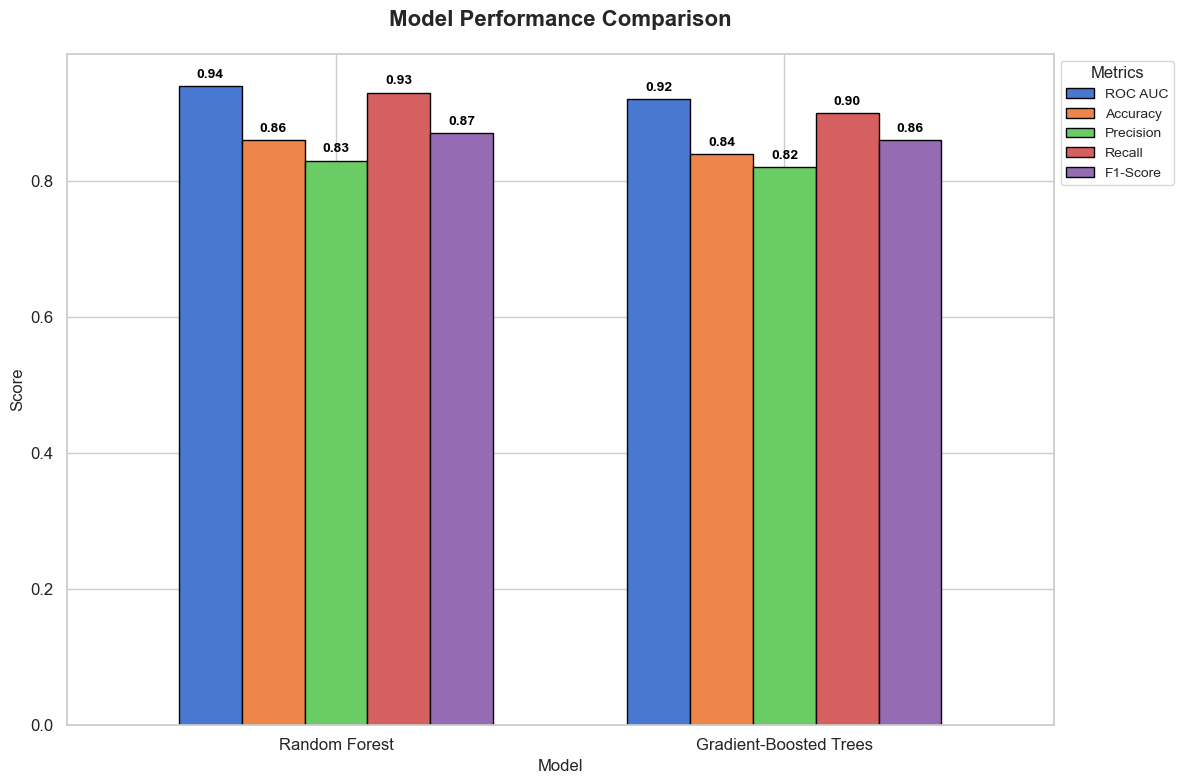

In [144]:

metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient-Boosted Trees"],
    "ROC AUC": [0.94, 0.92],
    "Accuracy": [0.86, 0.84],
    "Precision": [0.83, 0.82],
    "Recall": [0.93, 0.90],
    "F1-Score": [0.87, 0.86]
})

metrics_df.set_index("Model", inplace=True)

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Clean grid style
palette = sns.color_palette("muted")

# Plot
ax = metrics_df.plot(kind="bar", figsize=(12, 8), color=palette, edgecolor="black", width=0.7)
plt.title("Model Performance Comparison", fontsize=16, fontweight="bold", pad=20)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="center",
        xytext=(0, 8),  # Distance from bar
        textcoords="offset points",
        fontsize=10, color="black", fontweight="bold"
    )

# Improve legend placement
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Metrics", title_fontsize=12, fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()


**Bar Chart**

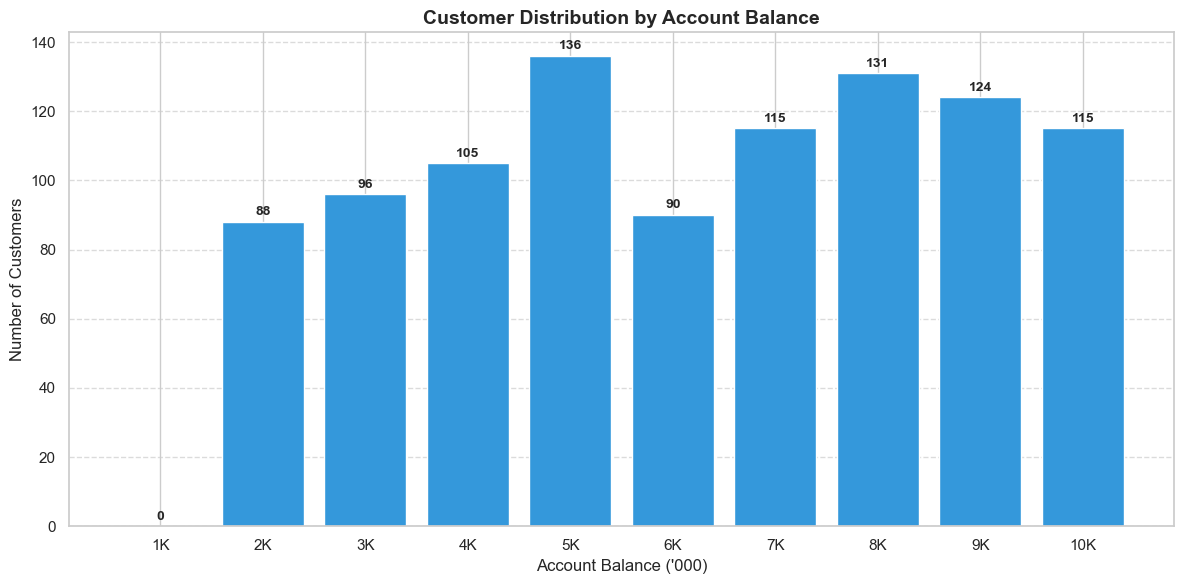

In [146]:
# Convert Spark DataFrame to Pandas for visualization
pandas_df = df_merged.toPandas()

# Step 1: Grouping Account Balance into Ranges (Bins)
bin_ranges = range(0, 10001, 1000)  # 0 to 10K, step of 1K
pandas_df['Account_Balance_Bin'] = pd.cut(pandas_df['Account_Bal'], bins=bin_ranges, labels=[f"{i}K" for i in range(1, 11)])

# Step 2: Calculate the Number of Customers per Bin
customer_counts = pandas_df['Account_Balance_Bin'].value_counts().sort_index()

# Step 3: Plotting the Bar Chart
plt.figure(figsize=(12, 6))

# Create the bar plot
bars = plt.bar(customer_counts.index, customer_counts.values, color='#3498db', width=0.8)

# Add Value Labels Above Each Bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Step 4: Add Titles and Labels
plt.title("Customer Distribution by Account Balance", fontsize=14, fontweight='bold')
plt.xlabel("Account Balance ('000)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Display gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

**Donut Chart**

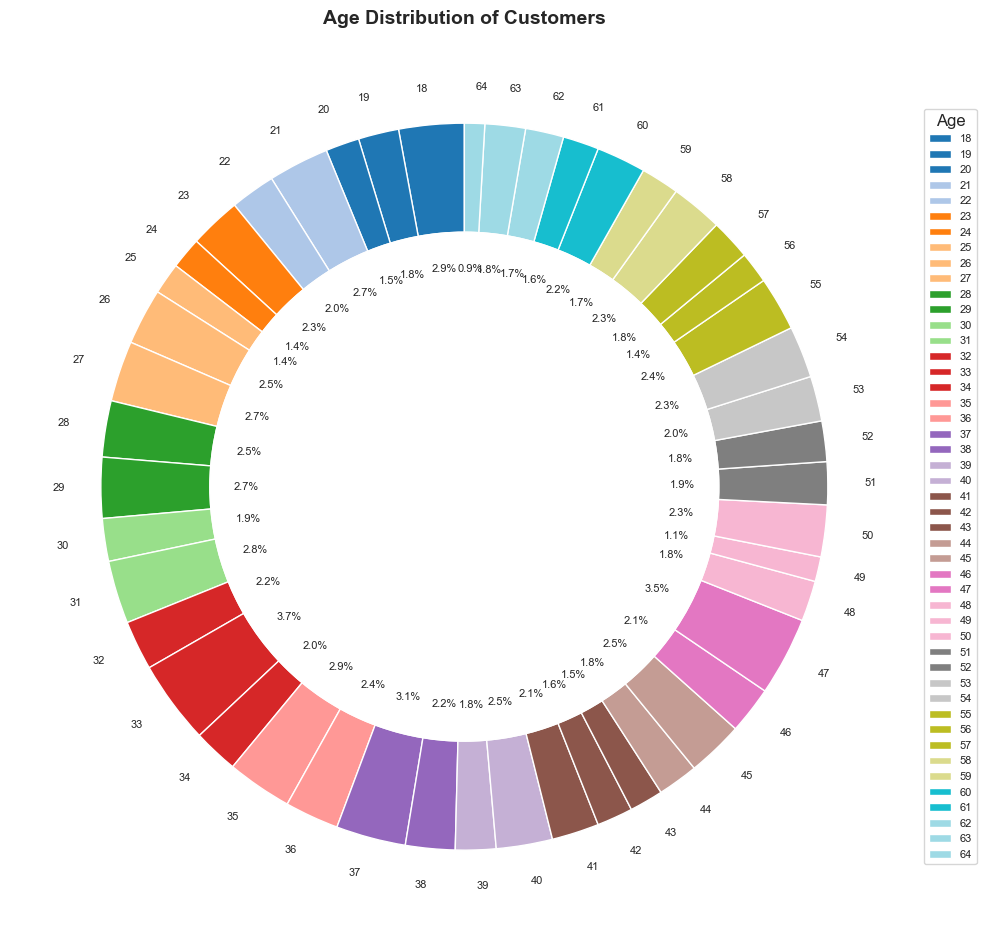

In [148]:
pandas_df = pandas_df.dropna(subset=['Age'])  # Ensure no null values in Age

# Step 2: Calculate Age Distribution
age_distribution = pandas_df['Age'].value_counts(normalize=True).sort_index()

# Step 3: Define Colors and Adjust Size
colors = plt.cm.tab20(np.linspace(0, 1, len(age_distribution)))  # Color palette

# Step 4: Create Donut Chart
fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size for clarity

# Plot Donut Chart
wedges, texts, autotexts = ax.pie(
    age_distribution,
    labels=age_distribution.index,
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=90,      # Rotate for better orientation
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='w'),  # Make it a donut chart
    textprops={'fontsize': 8}  # Adjust text size
)

# Step 5: Add a Circle in the Center (for donut style)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Adjust center size
fig.gca().add_artist(centre_circle)

# Step 6: Add a Legend Outside the Chart
ax.legend(
    wedges, age_distribution.index,
    title="Age",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Better alignment outside
    fontsize=8
)

# Step 7: Add Title
plt.title("Age Distribution of Customers", fontsize=14, fontweight="bold")

# Step 8: Improve Layout
plt.tight_layout()  # Avoid overlaps

# Display the Chart
plt.show()